### Importing and Setting paths
####

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/ECC/Career Foundry/Anaconda Python CF Exercises'
C_MERGE = pd.read_pickle(r'/Users/ECC/Career Foundry/Anaconda Python CF Exercises/02 Data/Prepared Data/C_MERGE.pkl')


In [3]:
## Using the complete C_MERGE df created with all essential data; stripped of unneccesary information
## Checking all data before proceeding

In [4]:
C_MERGE.head()

,user_id,Gender,STATE,Age,date_joined,Dependents,Marital_status,income,order_id,order_number,...,loyalty_flag,mean_spending,spending_flag,median_order_days,median_flag,Region,Customer_activity,Age_group,Unnamed: 0,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,9966,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,9966,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,9966,beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,35934,dairy eggs
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,35934,dairy eggs


In [5]:
## Create a regional segmentation of the data. 
## You’ll need to create a “Region” column based on the “State” column from your customers data set. 

region=[]
for value in C_MERGE['STATE']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [7]:
# create new column for region
C_MERGE['Region'] = region
C_MERGE.head()

,user_id,Gender,STATE,Age,date_joined,Dependents,Marital_status,income,order_id,order_number,...,loyalty_flag,mean_spending,spending_flag,median_order_days,median_flag,Region,Customer_activity,Age_group,Unnamed: 0,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,9966,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,9966,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,9966,beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,35934,dairy eggs
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,35934,dairy eggs


In [8]:
## Region column successful.
## Create crosstab to compare regions

region_spending = pd.crosstab(C_MERGE['Region'], C_MERGE['spending_flag'], dropna = False)
region_spending

spending_flag,High spender,Low spender
Region,,
Midwest,7589794,7791
Northeast,5717332,5607
South,10782288,10012
West,8284737,8480


In [9]:
## Success ! 
## Create new column Customer_activity to identify Low-activity customers

C_MERGE.loc[C_MERGE['max_order']>=5,'Customer_activity']='High-activity customer'
C_MERGE.loc[C_MERGE['max_order']<5,'Customer_activity']='Low-activity customer'

C_MERGE['Customer_activity'].value_counts(dropna = False)

High-activity customer    30965686
Low-activity customer      1440355
Name: Customer_activity, dtype: int64

In [10]:
## Create subset for High-activity customers


high_activity_cust = C_MERGE[C_MERGE['Customer_activity'] == 'High-activity customer']
high_activity_cust.shape
high_activity_cust.head()

,user_id,Gender,STATE,Age,date_joined,Dependents,Marital_status,income,order_id,order_number,...,loyalty_flag,mean_spending,spending_flag,median_order_days,median_flag,Region,Customer_activity,Age_group,Unnamed: 0,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,9966,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,9966,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,9966,beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,35934,dairy eggs
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,New customer,12.6,High spender,19.0,NaN,Midwest,High-activity customer,Middle-aged,35934,dairy eggs


In [11]:
## Export this subset
high_activity_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_2.pkl'))

### Creating demographic information / Customer profiling

In [12]:
C_MERGE.loc[C_MERGE['Age'] >= 35 & (C_MERGE['Age'] < 60), 'Age_group'] = 'Middle-aged'

In [13]:
C_MERGE.loc[C_MERGE['Age'] <35,'Age_group']='Young adult'

In [14]:
C_MERGE.loc[C_MERGE['Age'] >= 60,'Age_group']='Elderly'

In [15]:
C_MERGE['Age_group'].value_counts()

Middle-aged    12710446
Elderly        11067627
Young adult     8627968
Name: Age_group, dtype: int64

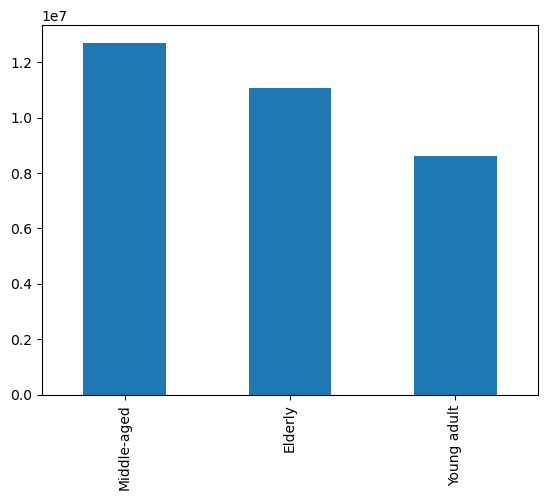

In [16]:
age_bar = C_MERGE['Age_group'].value_counts().plot.bar()

In [18]:
## Save visualisation for client
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Age_bar2.png'), bbox_inches='tight')

In [20]:
region_age=pd.crosstab(C_MERGE['Region'],C_MERGE['Age_group'],dropna=False)

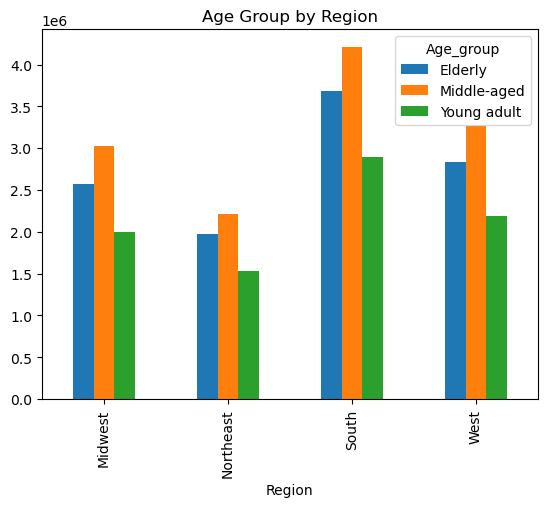

In [21]:
## Create a visual comparing age and region
regions_age=region_age.plot.bar()
plt.title('Age Group by Region')
plt.show()

In [22]:
## Save visualisation for client
regions_age.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Age_region2.png'), bbox_inches='tight')

In [23]:
## Create a crosstab with Department and Prices.
## Trying different combinations when it works,great. When it doesn't, try again.
department_dow = pd.crosstab(C_MERGE['spending_flag'],C_MERGE['Region'],dropna=False,)

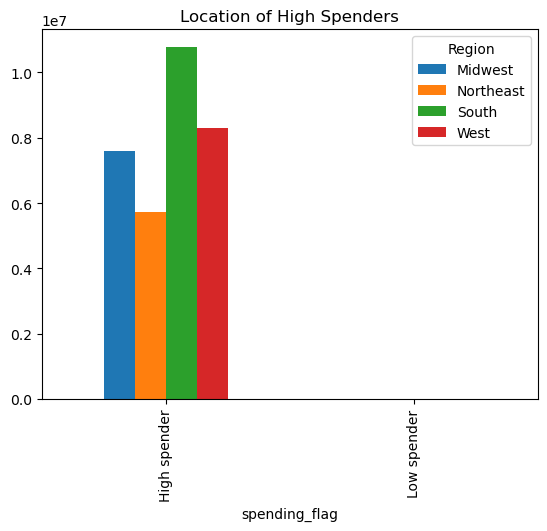

In [24]:
department_dow_viz=department_dow.plot.bar()
plt.title('Location of High Spenders')
plt.show()

In [25]:
## Save visualisation for client
department_dow_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'High Spender Location.png'), bbox_inches='tight')

In [27]:
## This viz shows the South leads in sales for High Spenders, while the Northeast is the lowest in sales.
## Between the West and Midwest the difference is not so great.

In [28]:
Marital_age = pd.crosstab(C_MERGE['Marital_status'],C_MERGE['Age_group'],dropna=False,)

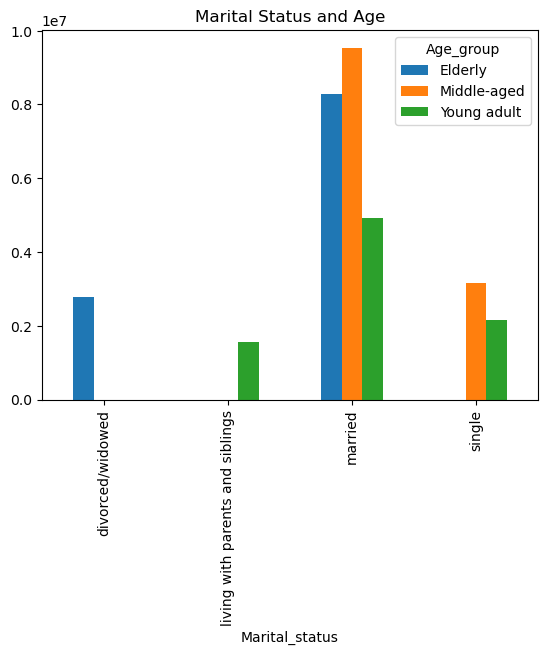

In [29]:
Marital_age_viz=Marital_age.plot.bar()
plt.title('Marital Status and Age')
plt.show()

In [30]:
Marital_age_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Marital status.png'), bbox_inches='tight')

In [31]:
##  The viz tells us that the majority of customers are married and either Middle-aged or Elderly.

In [32]:
Region_gender = pd.crosstab(C_MERGE['Gender'],C_MERGE['Region'],dropna=False,)

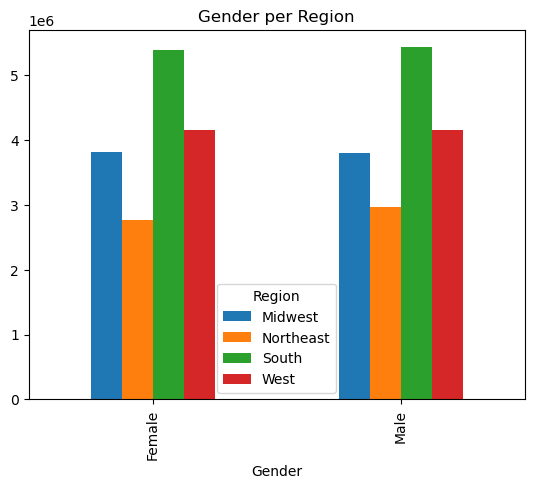

In [33]:
## Region and Gender 
Region_gender_viz=Region_gender.plot.bar()
plt.title('Gender per Region')
plt.show()

In [34]:
## This chart shows the spending habits across the regions when looking at Gender are essentially equal.
Region_gender_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Gender v Region.png'), bbox_inches='tight')


In [35]:
C_MERGE.to_pickle(os.path.join(r'/Users/ECC/Career Foundry/Anaconda Python CF Exercises/02 Data/Prepared Data/C_MERGE.pkl'))